In [1]:
# Fixing imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_openml
import time

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Fixing ys and xs for training
# x = x.reshape(len(x), 28, 28)

real_y_train = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for i in range(len(y_train))])
for i in range(len(y_train)):
    real_y_train[i, y_train[i]] = 1.0
    
real_y_test = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for i in range(len(y_test))])
for i in range(len(y_test)):
    real_y_test[i, y_test[i]] = 1.0

In [4]:
# Splitting to train and test sets
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

TRAINING_BATCHES = 600

x_train_batches = np.split(x_train, TRAINING_BATCHES)
y_train_batches = np.split(real_y_train, TRAINING_BATCHES)

In [18]:
class DigitRecognizer():
    def __init__(self):
        self.x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
        self.y = tf.placeholder(tf.float32)
        
#         self.W1 = tf.Variable(tf.random_normal([5, 5, 1, 32]))
#         self.b1 = tf.Variable(tf.random_normal([32]))
#         self.W2 = tf.Variable(tf.random_normal([14*14*32, 10]))
#         self.b2 = tf.Variable(tf.random_normal([10]))
        
#         conv1 = tf.nn.bias_add(tf.nn.conv2d(self.x, self.W1, strides=[1, 1, 1, 1], padding='SAME'), self.b1)
#         pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        conv1 = tf.layers.conv2d(self.x, filters=32, kernel_size=[3, 3], strides=[1, 1], padding='SAME')
        pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2, 2], strides=[2, 2], padding='SAME')
        relu1 = tf.nn.relu(pool1)
        conv2 = tf.layers.conv2d(relu1, filters=64, kernel_size=[3, 3], strides=[1, 1], padding='SAME')
        pool2 = tf.layers.max_pooling2d(conv2, pool_size=[2, 2], strides=[2, 2], padding='SAME')
        relu2 = tf.nn.relu(pool2)
        
        logits = tf.layers.dense(tf.layers.flatten(relu2), units=10)
        
        self.f = tf.nn.softmax(logits)
        self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.f, 1), tf.argmax(self.y, 1)), tf.float32))
        self.loss = tf.losses.softmax_cross_entropy(self.y, logits)

In [19]:
model = DigitRecognizer()
mini_op = tf.train.AdamOptimizer(0.001).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

start = time.time()

EPOCHS = 20

accs = []

for epoch in range(EPOCHS):
    start_epoch = time.time()
    print("Epoch %d" % (epoch + 1))
    for batch in range(TRAINING_BATCHES):
        session.run(mini_op, {model.x: x_train_batches[batch], model.y: y_train_batches[batch]})
    acc = session.run([model.accuracy], {model.x: x_test, model.y: real_y_test})
    accs.append(acc[0]*100)
    print("Accuracy after %d epoch(s): %.2f%s" % ((epoch+1), acc[0]*100, "%"))
    end_epoch = time.time()
    print("Time for epoch %.d: %.f" % ((epoch+1), (end_epoch - start_epoch)))

end = time.time()
print("Runtime: %.2f" % (end - start))

loss, accuracy = session.run([model.loss, model.accuracy], {model.x: x_test, model.y: real_y_test})

Epoch 1
Accuracy after 1 epoch(s): 86.93%
Time for epoch 1: 15
Epoch 2
Accuracy after 2 epoch(s): 88.28%
Time for epoch 2: 14
Epoch 3
Accuracy after 3 epoch(s): 88.47%
Time for epoch 3: 14
Epoch 4
Accuracy after 4 epoch(s): 88.89%
Time for epoch 4: 14
Epoch 5
Accuracy after 5 epoch(s): 89.13%
Time for epoch 5: 14
Epoch 6
Accuracy after 6 epoch(s): 89.10%
Time for epoch 6: 14
Epoch 7
Accuracy after 7 epoch(s): 88.93%
Time for epoch 7: 14
Epoch 8
Accuracy after 8 epoch(s): 88.23%
Time for epoch 8: 14
Epoch 9
Accuracy after 9 epoch(s): 88.33%
Time for epoch 9: 14
Epoch 10
Accuracy after 10 epoch(s): 88.95%
Time for epoch 10: 14
Epoch 11
Accuracy after 11 epoch(s): 89.05%
Time for epoch 11: 14
Epoch 12
Accuracy after 12 epoch(s): 88.70%
Time for epoch 12: 14
Epoch 13
Accuracy after 13 epoch(s): 88.80%
Time for epoch 13: 14
Epoch 14
Accuracy after 14 epoch(s): 87.98%
Time for epoch 14: 14
Epoch 15
Accuracy after 15 epoch(s): 89.18%
Time for epoch 15: 14
Epoch 16
Accuracy after 16 epoch(s): 

In [28]:
predictions, accuracy = session.run([model.f, model.accuracy], {model.x: x_test, model.y: real_y_test})
for p in predictions:
    max = 0
    index = 0
    for n in range(len(p)):
        if p[n] > max:
            max = p[n]
            index = n
    for n in range(len(p)):
        p[n] = 0 if not n == index else 1
        
acc = sum([int(list(predictions[i]) == list(real_y_test[i])) for i in range(len(predictions))])/len(predictions)*100
print("%.2f%s accuracy" % (acc, '%'))

89.35% accuracy


In [29]:
print(accuracy)

0.8935


<IPython.core.display.Javascript object>


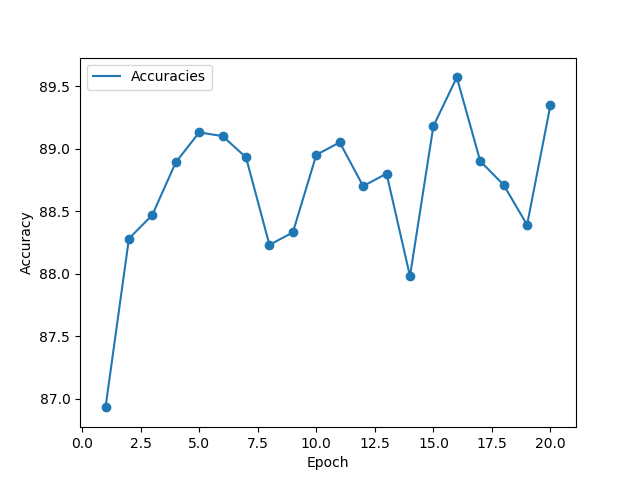

In [30]:
%matplotlib notebook
plt.plot([x for x in range(1, len(accs)+1)], accs, label='Accuracies')
plt.scatter([x for x in range(1, len(accs)+1)], accs)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()